In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# 1.Data processing 

In [2]:
# Load Datasets
deaths = pd.read_csv("malaria_deaths.csv")
deaths_age = pd.read_csv("malaria_deaths_age.csv")
inc = pd.read_csv("malaria_inc.csv")

# Remove index for death_age
deaths_age.drop(columns=deaths_age.columns[0], axis=1,  inplace=True)


## 1.1.Malaria Deaths

In [3]:
# Since we have the Entity column, we can proceed without imputing these missing values
deaths.isnull().sum()

Entity                                                                                0
Code                                                                                864
Year                                                                                  0
Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)      0
dtype: int64

In [4]:
# The average death rate is approximately 16.38 per 100,000 people
# Most of the Entities have low death rate from malaria, the death rate is highly skewed
deaths.describe()

,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
count,6156.000000,6156.000000
mean,2003.000000,16.375074
std,7.789514,38.606219
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.020219
75%,2010.000000,3.891035
max,2016.000000,229.228881


## 1.2.Malaria Deaths Age

In [5]:
# Since we have the Entity column, we can proceed without imputing these missing values
deaths_age.isnull().sum()

entity          0
code         4320
year            0
age_group       0
deaths          0
dtype: int64

In [6]:
# The average death rate per 100,000 people decreases as the age group increases
# Malaria death seems to be prevalent among children under 5
deaths_age.groupby('age_group')['deaths'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
15-49,6156.0,1374.686378,6469.090645,0.0,0.0,0.674004,161.518047,78710.192455
5-14,6156.0,1667.992078,8169.266695,0.0,0.0,0.034159,74.362580,91583.975140
50-69,6156.0,786.225126,3788.739024,0.0,0.0,0.220090,64.845402,43481.110009
70 or older,6156.0,487.850119,2394.329525,0.0,0.0,0.133791,28.019963,27165.882882
Under 5,6156.0,14175.998487,73200.321377,0.0,0.0,0.047517,216.619634,752025.548675


## 1.3.Malaria Inc

In [7]:
# Since we have the Entity column, we can proceed without imputing these missing values
inc.isnull().sum()

Entity                                                                                  0
Code                                                                                  108
Year                                                                                    0
Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)      0
dtype: int64

In [8]:
# Most of the Entities have low incidence of malaria, and the incidence rate is highly skewed
inc.describe()

,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
count,508.00000,508.000000
mean,2007.50000,141.714565
std,5.59568,176.637900
min,2000.00000,0.000000
25%,2003.75000,6.986310
50%,2007.50000,57.050000
75%,2011.25000,246.050000
max,2015.00000,1741.000000


# 2.Visualizations

## 2.1.Age Group Analysis

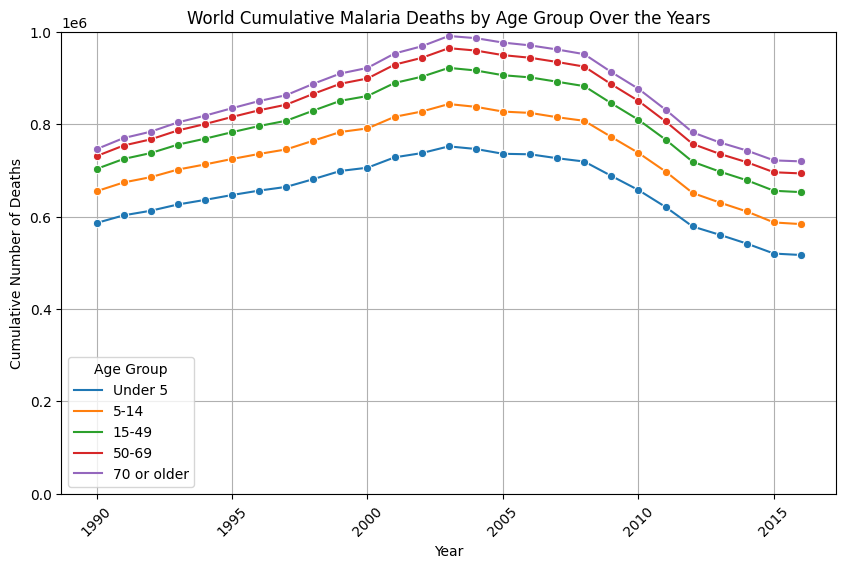

In [9]:
# Create a new column for the ordered age groups
world_deaths_by_age = deaths_age[deaths_age['entity'] == 'World'].copy()
age_group_order = ['Under 5', '5-14', '15-49', '50-69', '70 or older']
world_deaths_by_age['age_group_ordered'] = pd.Categorical(world_deaths_by_age['age_group'], categories=age_group_order, ordered=True)

# Sort data by year and the ordered age groups
world_deaths_by_age.sort_values(by=['year', 'age_group_ordered'], inplace=True)

# Calculate the cumulative sum correctly, starting with the "Under 5" group
world_deaths_by_age['cumulative_deaths'] = world_deaths_by_age.groupby('year')['deaths'].cumsum()

# Create a line plot with different lines for each cumulative age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='cumulative_deaths', hue='age_group', data=world_deaths_by_age, marker='o', hue_order=age_group_order)

# Adding titles and labels
plt.ylim(0, 1000000)
plt.title('World Cumulative Malaria Deaths by Age Group Over the Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Deaths')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Age Group')

# Display the plot
plt.show()

## 2.2.Correlation Analysis

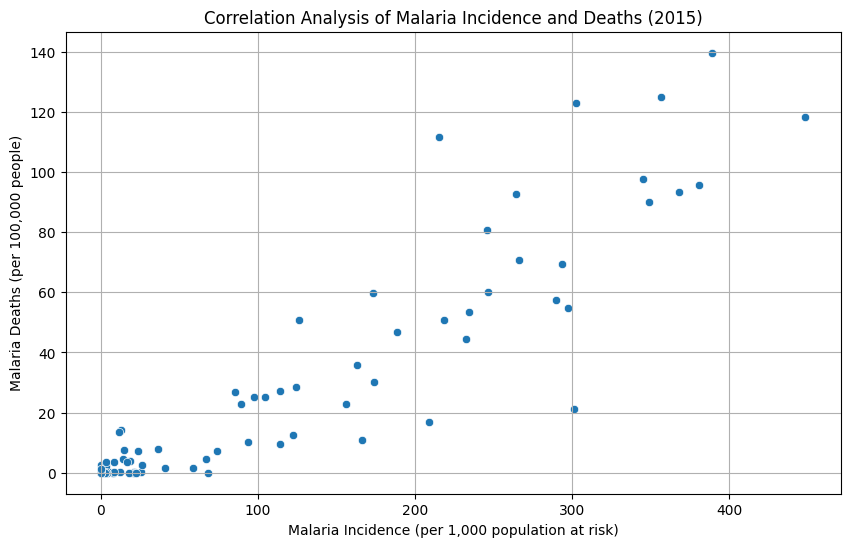

In [10]:
# Merging the incidence data and deaths data
merged_data = pd.merge(inc, deaths, how='inner', on=['Entity', 'Year'])

# Filtering data for 2015
data_2015 = merged_data[merged_data['Year'] == 2015]

# Adding titles and labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)', 
                y='Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)', 
                data=data_2015)
plt.title('Correlation Analysis of Malaria Incidence and Deaths (2015)')
plt.xlabel('Malaria Incidence (per 1,000 population at risk)')
plt.ylabel('Malaria Deaths (per 100,000 people)')
plt.grid(True)

# Display the plot
plt.show()

## 2.3.Nigeria Case Analysis

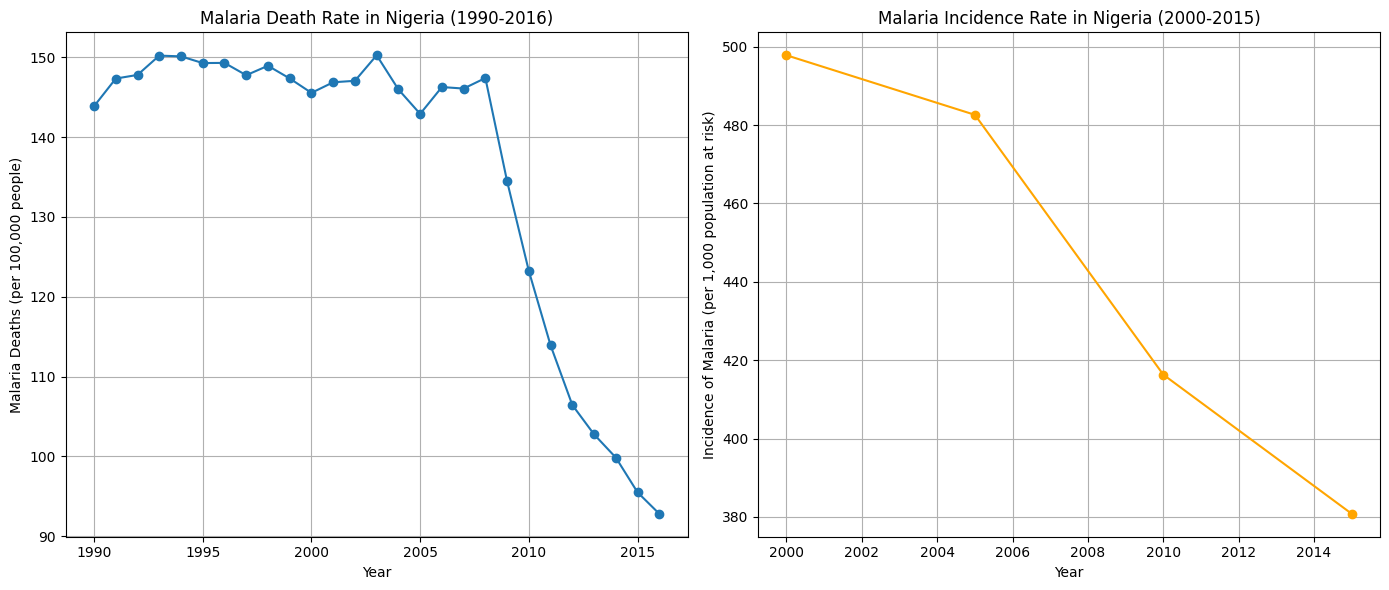

In [11]:
# Filter the data for Nigeria
deaths_nigeria = deaths[deaths['Entity'] == 'Nigeria']
inc_nigeria = inc[inc['Entity'] == 'Nigeria']

# Subplot 1: Malaria death rate over the years for Nigeria
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(deaths_nigeria['Year'], deaths_nigeria['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Malaria Deaths (per 100,000 people)')
plt.title('Malaria Death Rate in Nigeria (1990-2016)')
plt.grid(True)

# Subplot 2: Incidence of malaria over the years for Nigeria
plt.subplot(1, 2, 2)
plt.plot(inc_nigeria['Year'], inc_nigeria['Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)'], marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Incidence of Malaria (per 1,000 population at risk)')
plt.title('Malaria Incidence Rate in Nigeria (2000-2015)')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()